In [2]:
import numpy as np
import pandas as pd
from scipy import sparse
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
x_train = sparse.load_npz("X_train.npz").toarray()
x_test = sparse.load_npz("X_test.npz").toarray()
y_train = np.load("Y_train.npy")
y_test = np.load("Y_test.npy")


In [4]:
x_train = np.column_stack([np.ones(x_train.shape[0]),x_train])
x_test = np.column_stack([np.ones(x_test.shape[0]), x_test])

In [5]:
def Train_gd (X,Y, lr=0.001, epochs=500):
    n_samples, n_features = X.shape
    Y = Y.reshape(-1,1)
    W = np.zeros((n_features,1))
    b = 0
    losses = []
    for epoch in range(epochs):
        y_pred = X @ W +b
        loss = np.mean((y_pred - Y)**2)
        losses.append(loss)
        dW = (2/n_samples) * (X.T @ (y_pred - Y))
        db = (2/n_samples) * np.sum(y_pred - Y)
        W -= lr * dW
        b -= lr * db

    return W, b, losses

def Predict_gd(X,W,b):
    return X @ W + b

In [6]:
# model functions
def Train(X,Y):
    Beta = np.linalg.pinv(X) @ Y
    return Beta

def Predict(X,B):
    Y = X @ B 
    return Y

def MSE(y_t,y_p):
    y_t = y_t.squeeze()
    y_p = y_p.squeeze()
    MSE = np.mean(np.square(y_t - y_p))
    return MSE

In [7]:
B1 = Train(x_train,y_train)
W2, B2, loss = Train_gd(x_train,y_train)

In [8]:
y_predict = Predict(x_test,B1)
y_pred2 = Predict_gd(x_test,W2,B2)

In [9]:
mse1 = MSE(y_test,y_predict)
mse2 = MSE(y_test,y_pred2)

In [10]:
print(mse1,mse2)

0.670362348975817 0.6728793914563717


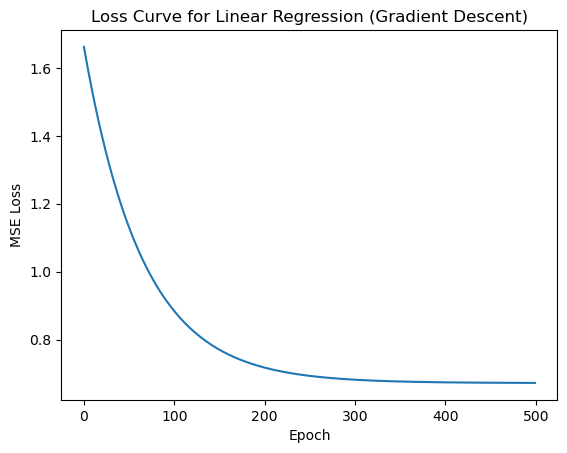

In [11]:
plt.plot(loss)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss Curve for Linear Regression (Gradient Descent)")
plt.savefig("loss_curve.png", dpi=300, bbox_inches="tight")
plt.show()